# Previsão de Churn para Clientes Bancários

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import  MultiComparison
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Exploração dos Dados

In [2]:
# Carregando dataset
dados = pd.read_csv('./dados/churn.csv')

In [3]:
# 10 primeiras linhas
dados.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8498,8499,15624892,Dennis,712,Germany,Male,37,7,93978.96,2,1,0,60651.77,0
4015,4016,15631603,Ponomaryova,813,France,Male,32,1,122889.88,1,1,1,26476.18,0
9481,9482,15613787,Chidubem,505,Spain,Male,35,8,116932.59,1,1,0,91092.84,0
6312,6313,15648136,Green,658,Germany,Female,28,9,152812.58,1,1,0,166682.57,0
1485,1486,15700212,Shih,475,France,Female,46,10,0.00,2,0,0,122953.00,1
3628,3629,15573319,Azubuike,493,Germany,Female,35,8,178317.60,1,0,0,197428.64,0
7159,7160,15798895,Okonkwo,525,France,Female,59,6,55328.40,1,1,0,83342.73,1
9897,9898,15810563,Ho,678,Spain,Female,61,8,0.00,2,1,1,159938.82,0
7862,7863,15811343,Cattaneo,644,Germany,Male,35,5,161591.11,3,1,1,63795.62,0
5887,5888,15691287,Ford,675,Germany,Female,33,0,141816.25,1,1,0,64815.05,1


In [4]:
# 10 últimas linhas
dados.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
# Atributos do dataset
dados.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
# Dimensões
dados.shape

(10000, 14)

In [7]:
# Informações dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Verificando a existência de dados nulos
dados.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# Varificando a quantidade de dados únicos em cada atributo
dados.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
# Estatística descritiva da base de dados
dados.describe().style.background_gradient(cmap='Greens')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,15690940.569400,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,2886.895680,71936.186123,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,1.000000,15565701.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.750000,15628528.250000,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.500000,15690738.000000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.250000,15753233.750000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.000000,15815690.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


A análise das variáveis numéricas na tabela de estatística descritiva da base de dados oferece insights valiosos. Os clientes, em média, apresentam um score de crédito de 650 pontos, com variação entre 350 e 850.

A média de idade é de 39 anos, variando de 18 a 92 anos. O tempo médio de relacionamento dos clientes com o banco é de 5 anos, atingindo no máximo 10 anos. A média do saldo bancário é de 76.485, e aproximadamente 70% dos clientes possuem cartão de crédito, enquanto 51% são considerados ativos.

Além disso, a estimativa média de salário é de 100.090. Destaca-se que 20% dos clientes encerraram sua relação com o banco, indicando uma porcentagem significativa de churn. Essas métricas proporcionam uma visão abrangente do perfil e comportamento dos clientes na base de dados analisada.

In [11]:
# Dados do atributo alvo
dados.Exited.unique()

array([1, 0], dtype=int64)

In [12]:
# Quantidade de cada valor de status
dados.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

**Observando a Distribuição dos dados da Variável Alvo**

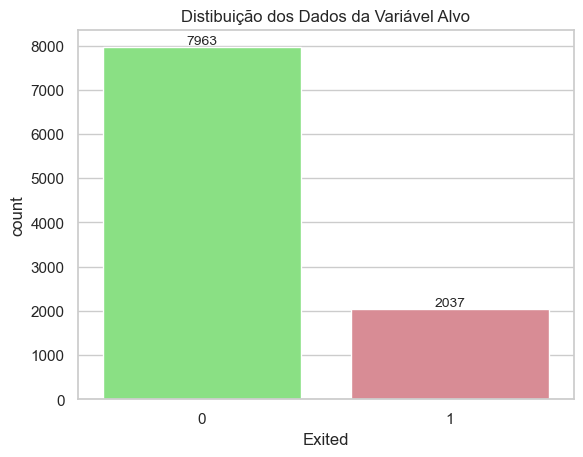

In [13]:
sns.set(style='whitegrid')
ax = sns.countplot(x = dados.Exited, palette=['#7df074', '#e57f8b'])
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Distibuição dos Dados da Variável Alvo')
plt.show()

A variável "Exited" possui duas categorias distintas: 0, indicando que o indivíduo é um cliente ativo, e 1, indicando que o mesmo não faz mais parte da base de clientes. A análise revela que, atualmente, 7.963 indivíduos permanecem como clientes, enquanto 2.037 optaram por encerrar sua relação com a empresa.

Essa constatação sugere que a organização ainda consegue reter uma parte considerável de seus clientes, mas enfrenta a perda de uma quantidade significativa, o que tem um impacto direto nos indicadores financeiros da instituição. Essa dinâmica ressalta a importância de estratégias eficientes de retenção e fidelização para otimizar o desempenho financeiro da empresa.

**Proporções entre Clientes**

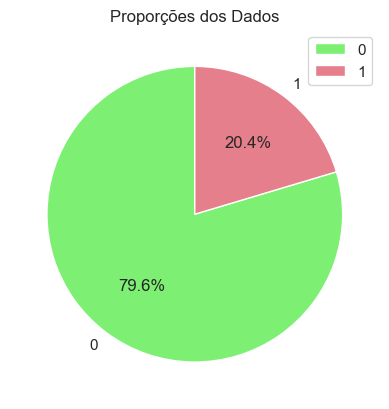

In [14]:
dados.Exited.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#7df074', '#e57f8b'])
plt.legend(loc='upper right')
plt.ylabel('')
plt.title('Proporções dos Dados')
plt.show()

Podemos constatar que a taxa de churn, representando os clientes que encerraram sua relação com a empresa, é de 20.4%. Isso significa que 79.6% dos clientes conseguiram ser retidos.

**Clientes com Risco de Churn pela Pontuação de Crédito**

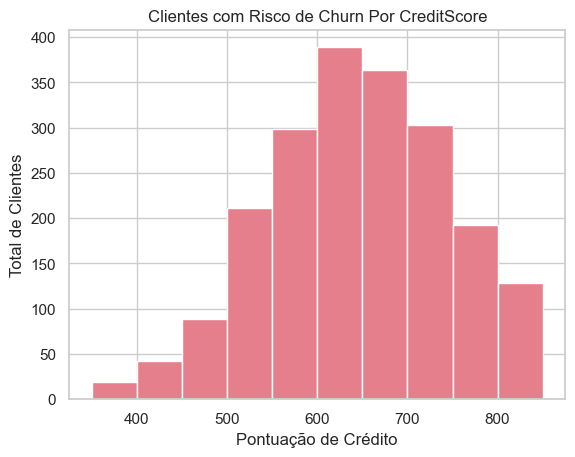

In [15]:
dados[dados.Exited == 1]['CreditScore'].hist(alpha=1.0, color='#e57f8b')
plt.title('Clientes com Risco de Churn Por CreditScore')
plt.xlabel('Pontuação de Crédito')
plt.ylabel('Total de Clientes')
plt.show()

O gráfico de histograma revela uma assimetria à direita, sugerindo que a maioria dos clientes que encerraram sua relação com o banco possuía uma pontuação de crédito elevada. Além disso, nota-se que a faixa de clientes com pontuação entre 600 e 700 pontos apresentou um maior número de saídas.

**Distribuição de Status de Clientes Por País**

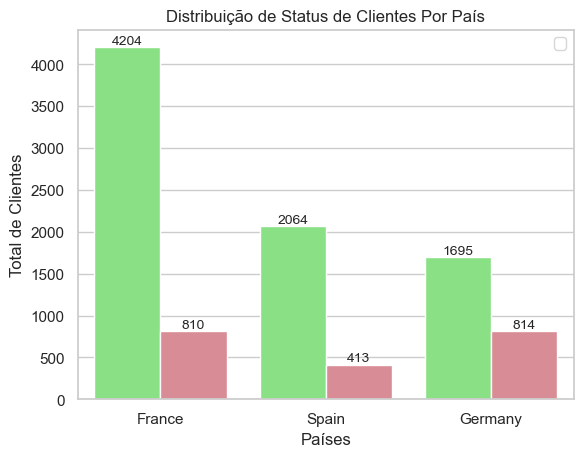

In [16]:
ax = sns.countplot(dados, x='Geography', hue='Exited', palette=['#7df074', '#e57f8b'])
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.xlabel('Países')
plt.ylabel('Total de Clientes')
plt.title('Distribuição de Status de Clientes Por País')
plt.legend('')
plt.show()

Ao analisar os dados, percebemos que a Alemanha registra a maior incidência de saída de clientes. Dos 2.509 clientes na região, aproximadamente 814 optaram por encerrar sua relação com a instituição, enquanto 1.695 ainda mantêm vínculo ativo. Isso representa uma taxa de churn de 32.44%.

**Clientes Por Gênero**

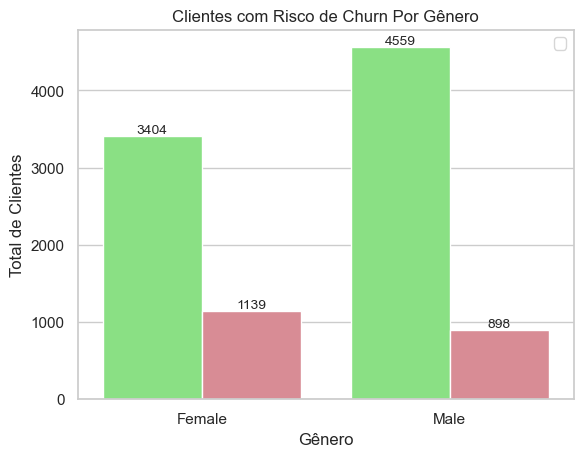

In [17]:
ax = sns.countplot(dados, x='Gender', hue='Exited', palette=['#7df074', '#e57f8b'])
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.xlabel('Gênero')
plt.ylabel('Total de Clientes')
plt.title('Clientes com Risco de Churn Por Gênero')
plt.legend('')
plt.show()

Podemos observar que entre os clientes autodeclarados como do gênero feminino, que totalizam 4.543, aproximadamente 1.139 encerraram sua relação com o banco. Em termos percentuais, isso representa uma taxa de churn de 25.07% no público feminino. Esses números destacam a importância de estratégias específicas de retenção voltadas para esse segmento, visando preservar e fortalecer a base de clientes femininos da instituição.

**Distribuição de Status de Clientes Por Idade**

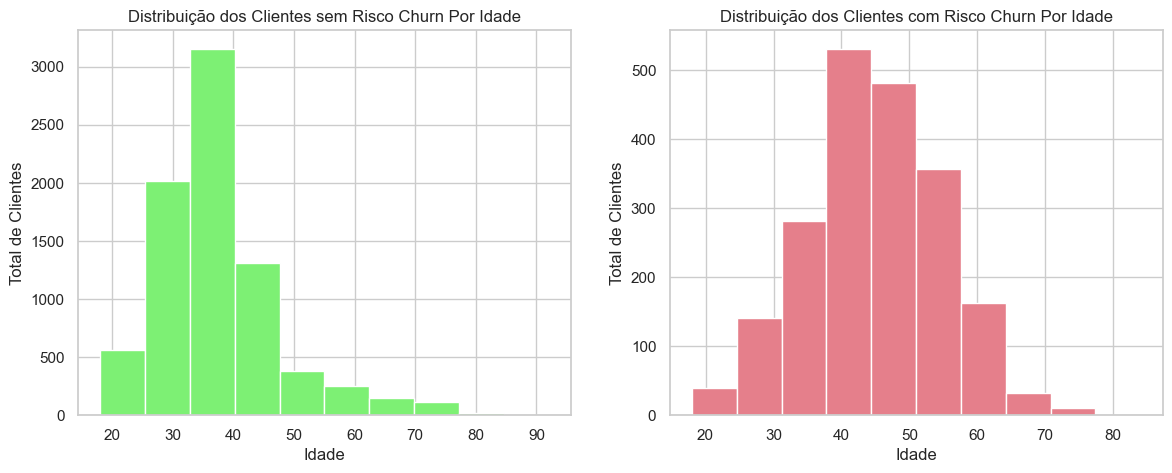

In [18]:
fig, axs = plt.subplots(1,2,figsize=(14,5))
dados[dados.Exited == 0]['Age'].hist(ax=axs[0],alpha=1.0, bins=10, color='#7df074')
axs[0].set_title('Distribuição dos Clientes sem Risco Churn Por Idade')
axs[0].set_xlabel('Idade')
axs[0].set_ylabel('Total de Clientes')
dados[dados.Exited == 1]['Age'].hist(ax=axs[1],alpha=1.0, bins=10, color='#e57f8b')
axs[1].set_title('Distribuição dos Clientes com Risco Churn Por Idade')
axs[1].set_xlabel('Idade')
axs[1].set_ylabel('Total de Clientes')
plt.show()

Analizando os dois gráficos, fica evidente que os clientes com idades entre 40 e 50 anos têm uma propensão maior a encerrar sua relação com a instituição, enquanto aqueles com idades entre 30 e 40 anos constituem a maioria dos clientes que permanecem retidos. 

**Taxa de Churn de Anos em que o Cliente é Cliente do Banco**

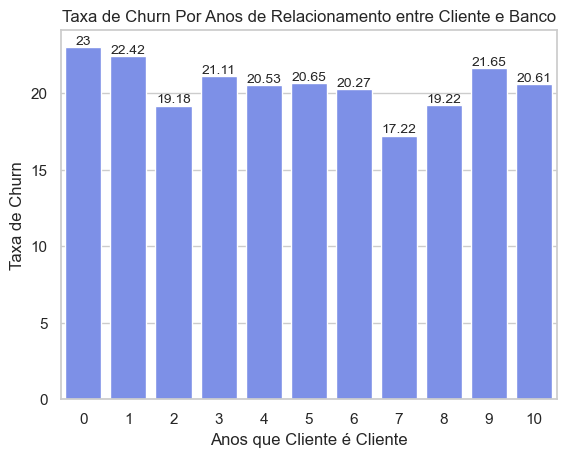

In [19]:
plot = dados.groupby('Tenure').Exited.mean().reset_index()
plot.Exited = round(plot.Exited * 100,2)
ax = sns.barplot(x='Tenure', y='Exited',data=plot, palette=['#6c85f8'])
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Anos que Cliente é Cliente')
plt.ylabel('Taxa de Churn')
plt.title('Taxa de Churn Por Anos de Relacionamento entre Cliente e Banco')
plt.show()

A duração do relacionamento do cliente com a instituição aparenta não ter uma influência significativa na taxa de churn. No entanto, destaca-se que há uma leve elevação na taxa de churn para clientes que possuem entre 0 e 1 ano de vínculo com a empresa.

**Distribuição de Status dos Clientes Por Saldo Bancário**

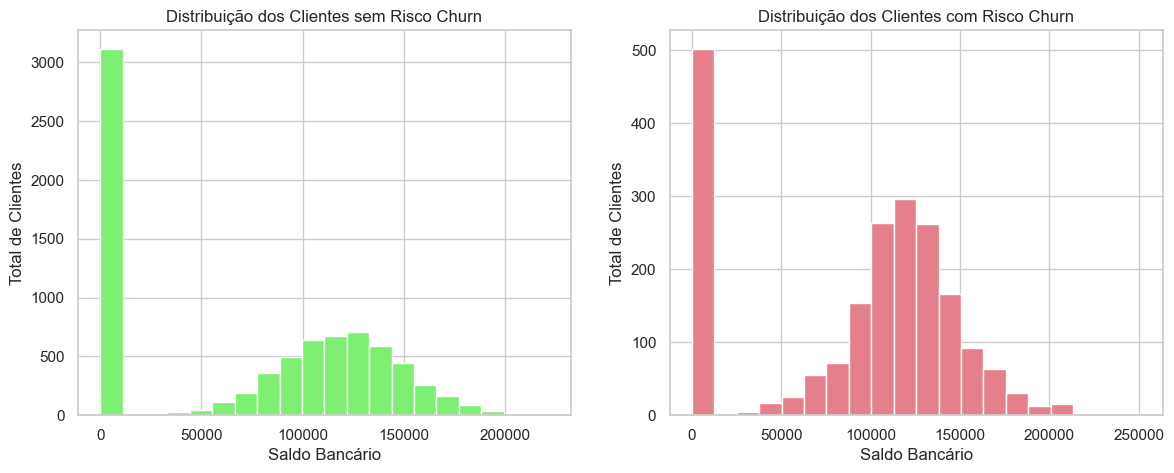

In [20]:
fig, axs = plt.subplots(1,2,figsize=(14,5))
dados[dados.Exited == 0]['Balance'].hist(ax=axs[0],alpha=1.0, bins=20, color='#7df074')
axs[0].set_title('Distribuição dos Clientes sem Risco Churn')
axs[0].set_xlabel('Saldo Bancário')
axs[0].set_ylabel('Total de Clientes')
dados[dados.Exited == 1]['Balance'].hist(ax=axs[1],alpha=1.0, bins=20, color='#e57f8b')
axs[1].set_title('Distribuição dos Clientes com Risco Churn')
axs[1].set_xlabel('Saldo Bancário')
axs[1].set_ylabel('Total de Clientes')
plt.show()

Ao examinar ambos os gráficos, nota-se que os clientes em churn possuem um saldo bancário mais elevado em comparação com aqueles que permaneceram, alcançando valores de até 250.000. Por outro lado, a maioria dos clientes que encerraram sua relação com o banco apresenta saldos predominantemente na faixa de 100.000 a 150.000.

**Taxa de Churn pela Quantidade de Produtos**

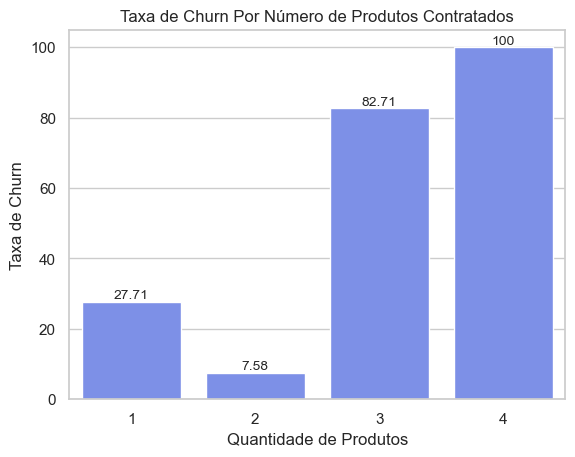

In [21]:
plot = dados.groupby('NumOfProducts').Exited.mean().reset_index()
plot.Exited = round(plot.Exited * 100,2)
ax = sns.barplot(x='NumOfProducts', y='Exited',data=plot, palette=['#6c85f8'])
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Quantidade de Produtos')
plt.ylabel('Taxa de Churn')
plt.title('Taxa de Churn Por Número de Produtos Contratados')
plt.show()

Observamos que os clientes que adquirem no máximo 2 produtos apresentam uma taxa de churn de apenas 7.58%, consideravelmente menor em comparação com a taxa de churn para clientes que contratam 3 produtos, a qual atinge 82.71%. A situação é ainda mais evidente para aqueles que optam por 4 produtos, onde a taxa de churn atinge 100%. Esses dados indicam claramente que à medida que o número de produtos contratados aumenta, a probabilidade de ocorrência do churn também cresce significativamente.

**Distribuição de Clientes que Tem ou Não Cartão de Crédito**

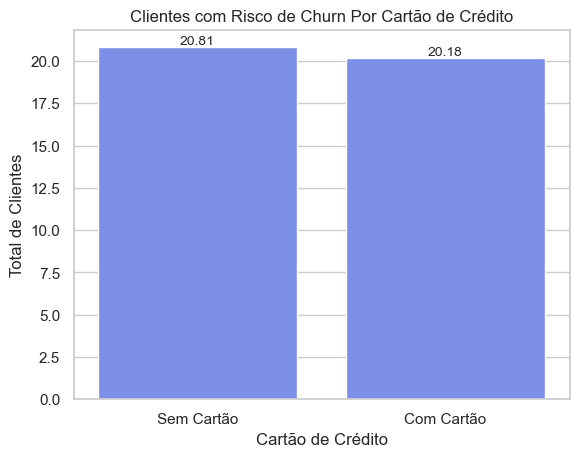

In [22]:
plot = dados.groupby('HasCrCard').Exited.mean().reset_index()
plot.Exited = round(plot.Exited * 100,2)
plot.HasCrCard = plot.HasCrCard.replace([0,1],['Sem Cartão','Com Cartão'])
ax = sns.barplot(x='HasCrCard', y='Exited', data=plot, palette=['#6c85f8'])
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Cartão de Crédito')
plt.ylabel('Total de Clientes')
plt.title('Clientes com Risco de Churn Por Cartão de Crédito')
plt.show()

Ao examinar o gráfico, constatamos que a posse ou a ausência de um cartão de crédito não parece influenciar na decisão de deixar a instituição, uma vez que ambos os grupos apresentam uma taxa de churn semelhante de 20%.

**Taxa de Churn Por Clientes Ativos e Inativos**

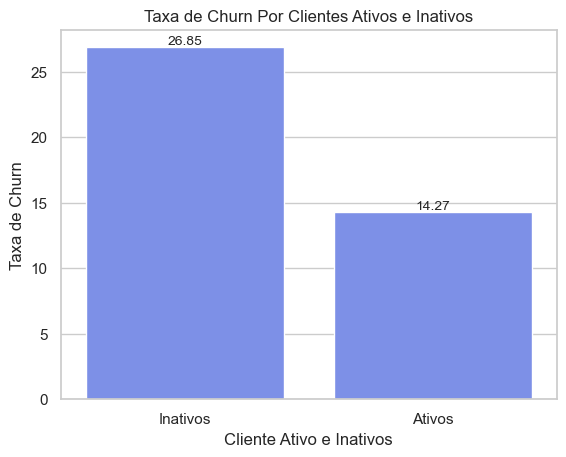

In [23]:
plot = dados.groupby('IsActiveMember').Exited.mean().reset_index()
plot.Exited = round(plot.Exited * 100,2)
plot.IsActiveMember = plot.IsActiveMember.replace([0,1],['Inativos','Ativos'])
ax = sns.barplot(x='IsActiveMember', y='Exited',data=plot, palette=['#6c85f8'])
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Cliente Ativo e Inativos')
plt.ylabel('Taxa de Churn')
plt.title('Taxa de Churn Por Clientes Ativos e Inativos')
plt.show()

Observa-se que a taxa de churn para clientes inativos é de 26.85%, em comparação com os ativos, que registram uma taxa de 14.27%. Portanto, é evidente que os clientes inativos têm a maior taxa de churn.

**Distribuição dos Clientes Por Estimativa de Salário**

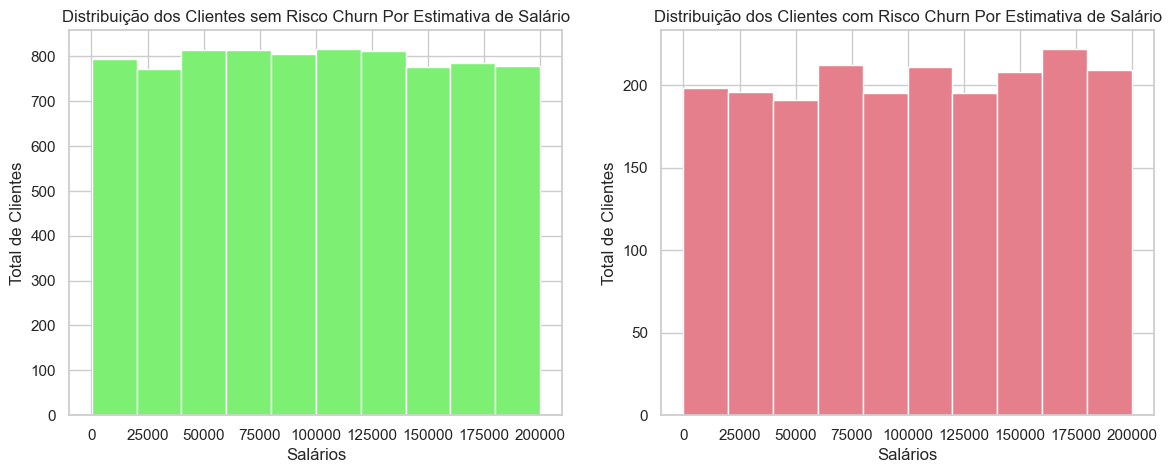

In [24]:
fig, axs = plt.subplots(1,2,figsize=(14,5))
dados[dados.Exited == 0]['EstimatedSalary'].hist(ax=axs[0],alpha=1.0, color='#7df074')
axs[0].set_title('Distribuição dos Clientes sem Risco Churn Por Estimativa de Salário')
axs[0].set_xlabel('Salários')
axs[0].set_ylabel('Total de Clientes')
dados[dados.Exited == 1]['EstimatedSalary'].hist(ax=axs[1],alpha=1.0, color='#e57f8b')
axs[1].set_title('Distribuição dos Clientes com Risco Churn Por Estimativa de Salário')
axs[1].set_xlabel('Salários')
axs[1].set_ylabel('Total de Clientes')
plt.show()

É possível notar que a estimativa de salário aparentemente não exerce influência na taxa de churn dos clientes do banco.

## Pré-processamento dos Dados

Vamos balancear os dados da variável 'Exited' que identificamos que estão desbalanceados, logo depois iremos dividi a  base de dados, 'X' para os atributos e 'Y' para o objetivo. Para garantir a eficácia dos algoritmos de machine learning, realizaremos a conversão de atributos categóricos de string para valores numéricos, utilizando a técnica OneHotEncoder. Isso evita que o algoritmo atribua pesos desproporcionais aos atributos. Além disso, aplicaremos o escalonamento dos valores com o uso do StandardScaler para padronizar os atributos na mesma escala, garantindo uma análise mais consistente. Por fim, vamos salvar a base processada para ser usada nos modelos de machine learning.

### Balanceamento dos Dados

>Aplicaremos o método de resample para nivelar os atributos na classe minoritária em relação à classe majoritária.

In [25]:
# separando os dados pelo atributo 0 e 1, onde vamos balancear conforme o 0 que é maioria
atributo_0 = dados[dados['Exited'] == 0]
atributo_1 = dados[dados['Exited'] == 1]

In [26]:
# Definindo o n_samples
n_samples = len(atributo_0)
n_samples

7963

In [27]:
# Balanceando atributo 1
atributo_1_balanceado = resample(atributo_1, replace=True, n_samples=n_samples)

In [28]:
# Criando base Balanceada
dados_balanceados = pd.concat([atributo_0, atributo_1_balanceado])

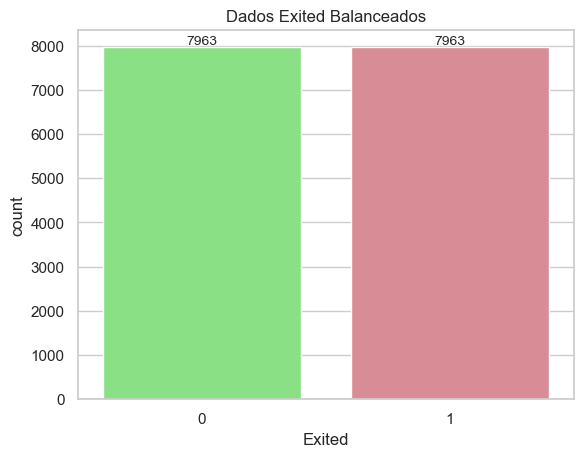

In [29]:
# Visualizando base balanceada
ax = sns.countplot(x=dados_balanceados['Exited'], palette=['#7df074', '#e57f8b'])
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Dados Exited Balanceados')
plt.show()

In [30]:
# Dimensões da base
dados_balanceados.shape

(15926, 14)

In [31]:
# Salvando base balanceada
dados_balanceados.to_csv('./dados/churn_balanceado.csv', index=False)

### Pré-processamento dos Dados Balanceados

In [32]:
# Carregando base de dados
df = pd.read_csv('./dados/churn_balanceado.csv')

In [33]:
# Removendo atributos que não são relevantes para previsão
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
1,699,France,Female,39,1,0.00,2,0,0,93826.63,0
2,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
3,822,France,Male,50,7,0.00,2,1,1,10062.80,0
4,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
15921,779,France,Female,48,2,115290.27,1,0,0,98912.69,1
15922,688,Spain,Female,33,2,0.00,1,0,0,27557.18,1
15923,691,France,Male,41,2,0.00,1,1,1,56850.92,1
15924,645,Spain,Female,49,5,110132.55,3,0,1,187689.91,1


In [34]:
# Definindo base X
X = df.drop('Exited', axis=True)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
1,699,France,Female,39,1,0.00,2,0,0,93826.63
2,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
3,822,France,Male,50,7,0.00,2,1,1,10062.80
4,501,France,Male,44,4,142051.07,2,0,1,74940.50


In [35]:
# Dimensões da base X
X.shape

(15926, 10)

In [36]:
# Definindo base Y
y = df.iloc[:,10]

# Visualizando os dados
y

0        0
1        0
2        0
3        0
4        0
        ..
15921    1
15922    1
15923    1
15924    1
15925    1
Name: Exited, Length: 15926, dtype: int64

### Aplicando o OneHotEncoder

In [37]:
# Variáveis categóricas
var_cat = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']

In [38]:
one_hot = make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'), var_cat), remainder='passthrough')

In [40]:
x_one_hot = one_hot.fit_transform(X)
x_df = pd.DataFrame(x_one_hot, columns=one_hot.get_feature_names_out())

In [42]:
x_df.shape

(15926, 18)

### Aplicando o StandardScaler

In [43]:
# Variáveis numéricas
var_num = ['remainder__CreditScore','remainder__Age','remainder__Tenure',
              'remainder__Balance','remainder__EstimatedSalary']

# Criando o StandardScaler
scaler = StandardScaler()

# Aplicando o escalonamento
x_df[var_num] = scaler.fit_transform(x_df[var_num])

### Divisão das Bases em Treino e Teste

>Vamos dividir as bases na proporção de 70/30, 70 para o treinamento e 30 para os testes.

In [44]:
# Criando base de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_df, y, test_size=0.3, random_state=1)

In [45]:
# Dimensões das bases de treino
x_treino.shape, y_treino.shape

((11148, 18), (11148,))

In [46]:
# Dimensões das bases de teste
x_teste.shape, y_teste.shape

((4778, 18), (4778,))

In [47]:
# Salvando base processada
with open('./dados/churn_processado.pkl', 'wb') as arquivo:
    pickle.dump([x_treino, x_teste, y_treino, y_teste], arquivo)

Ao término do processo de manipulação dos dados, obtivemos uma base composta por 15.926 linhas e 18 colunas, distribuídas na proporção de 70/30. Isso significa que 70% da base foi alocada para o treinamento do modelo, enquanto os restantes 30% foram reservados para os conjuntos de teste, garantindo uma abordagem eficiente na avaliação da performance do modelo.

## Machine Learning

Utilizaremos três algoritmos distintos para avaliar qual deles se destaca como o mais eficaz, eles são: 

1. [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
2. [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
3. [Redes Neurais Artificiais](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

A estratégia adotada envolve a implementação da técnica de validação cruzada para avaliar o desempenho dos três algoritmos. Para a avaliação de cada modelo, serão aplicadas as seguintes métricas:

- Accuracy
- Precisão
- Recall

Ao término do processo, os valores obtidos por cada modelo serão analisados.

In [48]:
def validacao_cruzada(algoritmo, base_treino_x:list[list[list]],base_treino_y:list[list[list]]) -> dict:
    '''Retorna um dicionário com as pontuações das métricas apontadas no cross_validate.'''
    accuracy = []
    precision = []
    recall = []

    for i in range(30):
        kfold = KFold(n_splits=10, shuffle=True, random_state=i)
        scores = cross_validate(algoritmo, base_treino_x, base_treino_y, cv=kfold,
                                   scoring=['accuracy', 'precision', 'recall'])
        accuracy.append(scores['test_accuracy'].mean())
        precision.append(scores['test_precision'].mean())
        recall.append(scores['test_recall'].mean())

    resultados = {'accuracy':accuracy, 'precision':precision, 'recall':recall}

    return resultados

In [49]:
# Carregando bases de treino e teste
with open('./dados/churn_processado.pkl', 'rb') as arquivo:
    x_treino, x_teste, y_treino, y_teste = pickle.load(arquivo)

In [50]:
# Criando classificadores
random_forest = RandomForestClassifier()
svm = SVC()
rna = MLPClassifier()

In [51]:
# Validando algoritmos
validacao_random_forest = validacao_cruzada(random_forest, x_treino, y_treino)
validacao_svm = validacao_cruzada(svm, x_treino, y_treino)
validacao_rna = validacao_cruzada(rna, x_treino, y_treino)

### Análise dos Resultados

In [52]:
# DataFrame com valores de accuracy dos modelos balanceados
accuracy = pd.DataFrame({'RandomForest':validacao_random_forest['accuracy'],
                         'SVM':validacao_svm['accuracy'],
                         'RNA':validacao_rna['accuracy']})

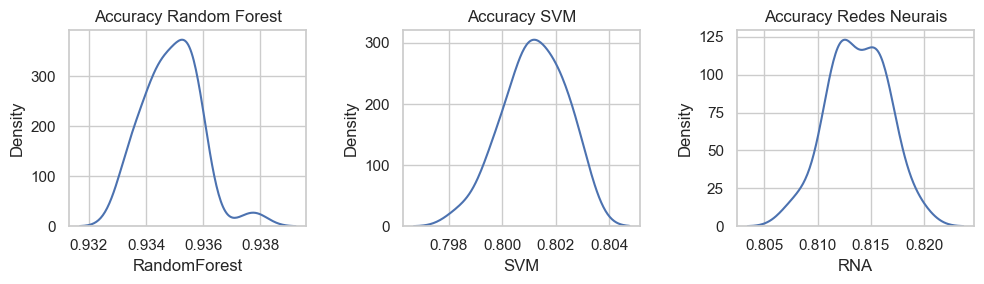

In [66]:
# Distribuição dos modelos
fig, axs = plt.subplots(1,3, figsize=(10,3))

sns.kdeplot(accuracy['RandomForest'], ax=axs[0])
axs[0].set_title('Accuracy Random Forest')
sns.kdeplot(accuracy['SVM'], ax=axs[1])
axs[1].set_title('Accuracy SVM')
sns.kdeplot(accuracy['RNA'], ax=axs[2])
axs[2].set_title('Accuracy Redes Neurais')

plt.tight_layout()
plt.show()

Os modelos treinados exibem uma distribuição normal. Isso indica que as previsões tendem a se agrupar em torno da média, proporcionando uma compreensão visual da consistência e padrões de comportamento dos modelos em diferentes conjuntos de dados.

In [67]:
# Avaliando as métricas dos modelos
resumo = pd.DataFrame(
    {'Modelos': ['accuracy', 'precision', 'recall'],
            'Random Forest': [
                np.mean(validacao_random_forest['accuracy']),
                np.mean(validacao_random_forest['precision']),
                np.mean(validacao_random_forest['recall'])],
            'SVM': [
                np.mean(validacao_svm['accuracy']),
                np.mean(validacao_svm['precision']),
                np.mean(validacao_svm['recall'])],
            'Redes Neurais': [
                np.mean(validacao_rna['accuracy']),
                np.mean(validacao_rna['precision']),
                np.mean(validacao_rna['recall'])]}).set_index('Modelos')


resumo = resumo.transpose()
resumo.style.applymap(lambda x: 'background-color: #7df074' if x >= 0.80 else '')

Modelos,accuracy,precision,recall
Random Forest,0.934882,0.908453,0.966272
SVM,0.801196,0.808410,0.785944
Redes Neurais,0.813754,0.816430,0.807057


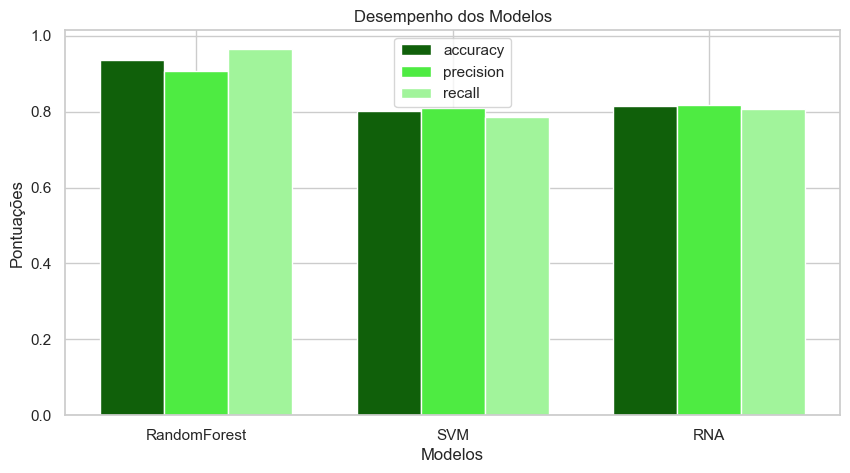

In [69]:
# Criando um gráfico para visualização
fig, ax = plt.subplots(figsize=(10, 5))

# Adiciona barras para cada métrica
largura_barra = 0.25
barra_1 = range(len(resumo))
barra_2 = [pos + largura_barra for pos in barra_1]
barra_3 = [pos + largura_barra for pos in barra_2]

# Cores das barras
cores = {'accuracy':'#10600a', 'precision':'#4eeb42', 'recall':'#a1f49b'}

ax.bar(barra_1, resumo['accuracy'], width=largura_barra, label='accuracy', color=cores['accuracy'])
ax.bar(barra_2, resumo['precision'], width=largura_barra, label='precision', color=cores['precision'])
ax.bar(barra_3, resumo['recall'], width=largura_barra, label='recall', color=cores['recall'])

# Adiciona rótulos
ax.set_xticks([pos + largura_barra for pos in barra_1])
ax.set_xticklabels(['RandomForest','SVM','RNA'])
ax.set_xlabel('Modelos')
ax.set_ylabel('Pontuações')
ax.set_title('Desempenho dos Modelos')
ax.legend()
plt.show()



Analisando os resultados dos modelos sobre as métricas de avaliação usadas:


- **Acurácia (Accuracy):**
<p>O modelo Random Forest alcançou a maior taxa, 93.48%, indicando uma alta taxa geral de classificação correta. Por outro lado os modelos SVM e RNA tiveram acurácias de 80.11% e 81.37% respectivamente, sugerindo uma menor precisão global.
    
</p>

- **Precisão (Precision):**
<p>O modelo Random Forest apresentou uma precisão de 90.84%, isso destaca a capacidade deste modelo em minimizar falsos positivos, já os modelos SVM e RNA apresentaram respectivamente 80.84% e 81.64%, indicando uma menor capacidade de minimizar falsos positivos.

</p>

- **Revocação (Recall):**
<p>O Random Forest apresentou 96.62% de recall, sugerindo que o modelo tem uma boa habilidade em identificar verdadeiros positivos. Já os modelos SVM e RNA obtiveram uma pontuação muito abaixo sendo respectivamente 78.59% e 80.70%, indicando baixa capacidade em identificar os verdadeiros positivos.</p>


O Random Forest se destaca pelas altas pontuações nas métricas, sendo assim, é a melhor opção dentre os três algoritmos.

## Teste de Hipóteses ANOVA e Tukey

### ANOVA

O teste ANOVA unidirecional avalia a hipótese nula entre dois ou mais grupos que possuem médias populacionais idênticas. Essa análise é aplicada a amostras provenientes de dois ou mais grupos, podendo apresentar tamanhos amostrais distintos.

In [71]:
# ANOVA teste
_, p = f_oneway(validacao_random_forest['accuracy'],validacao_svm['accuracy'],validacao_rna['accuracy'])

# Definindo alpha em 0.05, indica que o teste terá uma confiabilidade de 95%
alpha = 0.05

# Rejeitando a hipótese nula
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes')
else:
    print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


### Tukey

O teste de Tukey desempenha uma análise de comparação entre pares de médias em um conjunto de amostras. Especificamente, ele é utilizado para identificar diferenças significativas entre as médias de diferentes grupos, permitindo uma avaliação mais aprofundada das disparidades existentes no conjunto de dados. Essa abordagem é valiosa para destacar de maneira precisa as divergências entre grupos específicos, contribuindo para uma interpretação mais refinada dos resultados

In [72]:
# preparando base para teste
lista = [model for model in ['RandomForest', 'SVM','RNA'] for _ in range(30)]

resultado_algoritmos = {'Accuracy':np.concatenate([validacao_random_forest['accuracy'],validacao_svm['accuracy'],
                                                   validacao_rna['accuracy']]),'Algoritmo':lista}
resultado_algoritmos = pd.DataFrame(resultado_algoritmos)

In [73]:
# Aplicando teste de multiplas comparações
compara_algoritmos = MultiComparison(resultado_algoritmos['Accuracy'], resultado_algoritmos['Algoritmo'])

In [74]:
# Teste estatístico
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj  lower   upper  reject
---------------------------------------------------------------
         RNA RandomForest   0.1211   0.0    0.12  0.1222   True
         RNA          SVM  -0.0126   0.0 -0.0137 -0.0115   True
RandomForest          SVM  -0.1337   0.0 -0.1348 -0.1326   True
---------------------------------------------------------------


Os resultados apresentados sugerem que existe uma diferença estatisticamente significativa entre os modelos, corroborando as conclusões do teste realizado anteriormente.

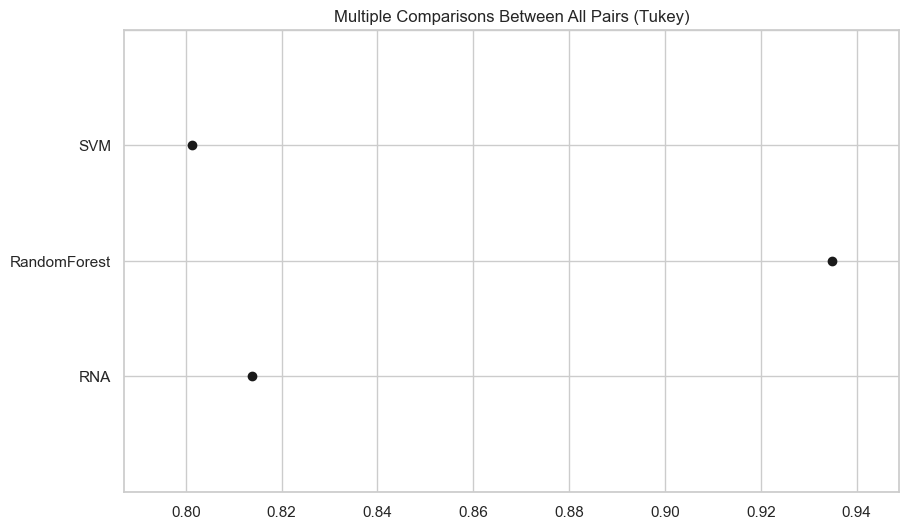

In [75]:
# Visualizando o melhor modelo
teste_estatistico.plot_simultaneous()
plt.show()

Após realizar o teste de Tukey nas métricas de acurácia derivadas da aplicação de diversos algoritmos ao conjunto de dados, fica evidente a presença de uma notável discrepância no desempenho entre esses algoritmos.

A análise visual destaca o Random Forest como um destaque significativo, enquanto, em contraste, a SVM demonstra o desempenho mais modesto nesse cenário específico. Diante dessa constatação, a decisão de implementar o algoritmo Random Forest é plenamente respaldada pela análise estatística, reforçando sua eficácia superior em relação aos outros algoritmos considerados.

## Tuning dos Hiperparâmetros

Agora que decidimos qual modelo aplicar, é hora de efetuar alguns ajustes. Inicialmente, o modelo RandomForest foi executado com suas configurações padrão. A fim de otimizar os resultados, procederemos com uma sintonia fina nos hiperparâmetros por meio da técnica de Grid Search, focando nos seguintes parâmetros:

- criterion
- n_estimators
- min_samples_split
- min_samples_leaf

In [76]:
# Concatenado as bases de treino e teste
X = np.concatenate((x_treino, x_teste), axis=0)
y = np.concatenate((y_treino, y_teste), axis=0)

# Dimensões
X.shape, y.shape

((15926, 18), (15926,))

In [80]:
# Hiperparâmetros
parametros = {
    'criterion':['gini', 'entropy'],
    'n_estimators':[10, 50, 100, 200],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 5, 10]
}

In [81]:
# Criando objeto GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)

# Treinando modelo
grid_search.fit(X, y)

# Melhores hiperparâmetros
melhores_parametros = grid_search.best_params_

# Melhor acurácia
melhor_resultado = grid_search.best_score_

# Visualizando os resultados
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9498303113799482


A melhor configuração para o algoritmo Random Forest para esse cenário  é:

- criterion         : gini
- n_estimators      : 100
- min_samples_split : 2
- min_samples_leaf  : 1

E apresentou uma precisão de 94.98%.

### Criando Modelo com as Definições

In [82]:
# Criando modelo
modelo = RandomForestClassifier(criterion='gini', n_estimators=100, min_samples_split=2,
                                min_samples_leaf=1, random_state=1)
modelo.fit(x_treino, y_treino)

# Criando previsões
previsoes = modelo.predict(x_teste)

In [83]:
# Acuracia do modelo
print('Acurácia:', round(accuracy_score(y_teste, previsoes), 2))

Acurácia: 0.94


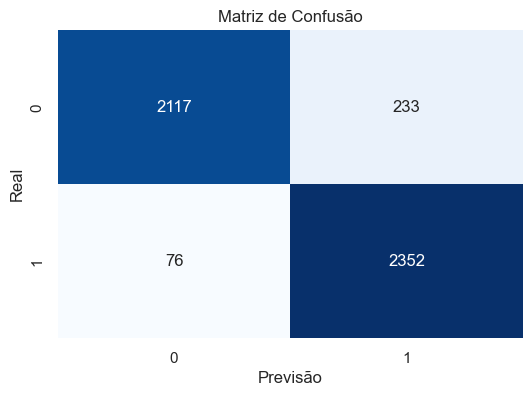

In [84]:
# Matriz de confusão
cm = confusion_matrix(y_teste, previsoes)

# Gráfico
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Na matriz de confusão, notamos que o modelo acertou a classificação de 2.117 registros como (0), indicando que esses clientes não deixaram de ser clientes. No entanto, houve 233 casos em que o modelo errou essa classificação. Quanto aos registros de clientes que deixaram de ser clientes (1), o modelo acertou a classificação de 2.352 registros e errou a classificação de apenas 76.

In [85]:
# Estatíticas do modelo
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2350
           1       0.91      0.97      0.94      2428

    accuracy                           0.94      4778
   macro avg       0.94      0.93      0.94      4778
weighted avg       0.94      0.94      0.94      4778



Ao analisar os dados provenientes do 'classification_report', observamos os seguintes resultados:

- **Precision:**
<p>Em relação aos clientes que permanecem, 97% dos casos classificados como tal foram corretamente identificados, enquanto 91% dos casos classificados como "churn" realmente correspondiam a essa categoria.

</p>

- **Recall:**
<p>O modelo acertou identificando 90% dos casos em que não há risco de "churn" e alcançou uma taxa de 97% de acertos na identificação dos casos em que há risco de "churn".
</p>

Essas métricas oferecem uma compreensão abrangente do desempenho do modelo. De maneira geral, o modelo demonstra uma habilidade sólida em distinguir entre as duas classes, apresentando valores elevados de precisão, recall e f1-score. A acurácia global atinge 94%, indicando um desempenho consistente na classificação do conjunto de dados.

### Salvando Modelo

In [137]:
pickle.dump(modelo, open('./modelo/modelo_previsao_churn.sav', 'wb'))

### Analisando os Pesos das Variáveis

In [132]:
# Atributos da base de treino
x_treino.columns

Index(['onehotencoder__Geography_France', 'onehotencoder__Geography_Germany',
       'onehotencoder__Geography_Spain', 'onehotencoder__Gender_Female',
       'onehotencoder__Gender_Male', 'onehotencoder__NumOfProducts_1',
       'onehotencoder__NumOfProducts_2', 'onehotencoder__NumOfProducts_3',
       'onehotencoder__NumOfProducts_4', 'onehotencoder__HasCrCard_0',
       'onehotencoder__HasCrCard_1', 'onehotencoder__IsActiveMember_0',
       'onehotencoder__IsActiveMember_1', 'remainder__CreditScore',
       'remainder__Age', 'remainder__Tenure', 'remainder__Balance',
       'remainder__EstimatedSalary'],
      dtype='object')

In [133]:
# Definindo variável com os atributos
atributos = ['Geography_France', 'Geography_Germany','Geography_Spain', 'Gender_Female','Gender_Male', 
             'NumOfProducts_1','NumOfProducts_2', 'NumOfProducts_3','NumOfProducts_4', 'HasCrCard_0',
             'HasCrCard_1', 'IsActiveMember_0','IsActiveMember_1', 'CreditScore','Age', 'Tenure',
             'Balance','EstimatedSalary']

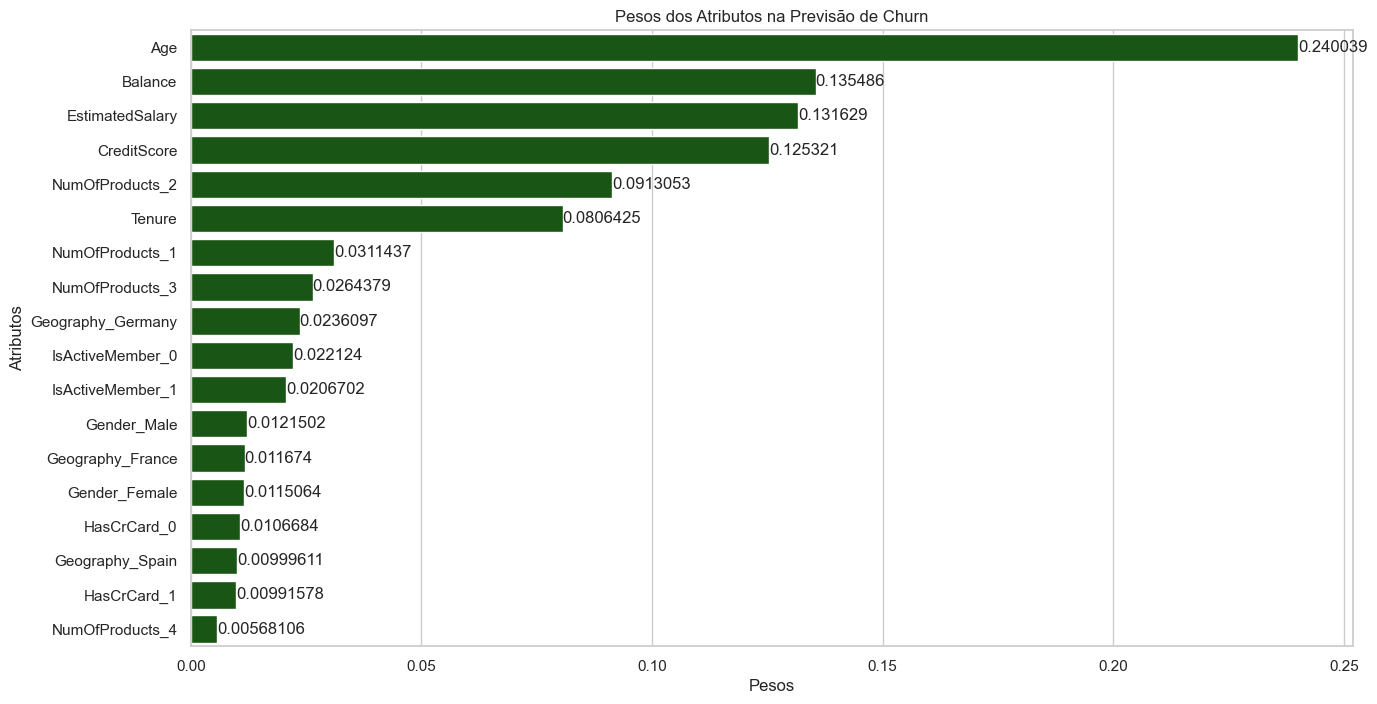

In [134]:
# Criando dataframe
pesos = pd.DataFrame({'Atributos': atributos, 'Pesos': modelo.feature_importances_})
pesos = pesos.sort_values('Pesos', ascending=False)
pesos = pesos.reset_index(drop=True)

# Gráfico
plt.figure(figsize=(15,8))
ax = sns.barplot(pesos, x='Pesos', y='Atributos', orient='h', color='#10600a')
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Pesos dos Atributos na Previsão de Churn')
plt.show()

Os dados gerados pelo método 'feature_importances_' fornecem insights sobre a importância relativa de cada atributo no processo de tomada de decisões do modelo. Cada atributo é associado a um peso, indicando a contribuição proporcional para a capacidade preditiva do modelo. Quanto maior o peso, mais influente é o atributo na previsão do resultado.

Interpretando esses dados, podemos destacar alguns pontos-chave:

- **Age:** É o atributo mais significativo, com um peso de 24%, sugerindo que a idade tem uma forte influência nas previsões do modelo.
- **Balance:** Contribui com 13.55%, indicando que o saldo também desempenha um papel importante nas decisões do modelo.
- **EstimatedSalary:** Possui uma influência considerável, contribuindo com 13.16%.
- **CreditScore:** Com um peso de 12.53%, destaca-se como um fator significativo nas previsões do modelo.
- **NumOfProducts_2:** Representa 9.13%, sugerindo que a quantidade específica de produtos também é relevante.
- **Tenure:** Representa 8.06%, destacando que o tempo em que o cliente é cliente da empresa é relevante.

A análise das importâncias das características permite uma compreensão mais profunda de como o modelo utiliza cada atributo para realizar previsões.

### Probabilidade de Churn Entre os Clientes

Por fim, a forma mais eficaz de aplicar esse modelo é associar a probabilidade de evasão a cliente, assim será possivel segmentar essas probabilidades e possibilide de desenvolvimento de estratégias.

In [107]:
# Preparando base
base_churn = dados.copy()
base_churn = base_churn.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=True)

# Processando variáveis categoricas
one_hot = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), var_cat), remainder='passthrough')
base_final = one_hot.fit_transform(base_churn)
base_final = pd.DataFrame(base_final, columns=one_hot.get_feature_names_out())

# Escalonando as variáveis numéricas
scaler = StandardScaler()
base_final[var_num] = scaler.fit_transform(base_final[var_num])

In [145]:
# Criando previsão de probabilidade de Churn
probabilidade = modelo.predict_proba(base_final)

In [146]:
# Criando dataframe de probabilidade de Churn
df_probabilidade = pd.DataFrame({'CustomerId':dados['CustomerId']})
df_probabilidade['Probabilidade'] = probabilidade[:,1] * 100

In [147]:
# Visualizando probabilidades
df_probabilidade

,CustomerId,Probabilidade
0,15634602,63.0
1,15647311,33.0
2,15619304,98.0
3,15701354,38.0
4,15737888,5.0
...,...,...
9995,15606229,8.0
9996,15569892,19.0
9997,15584532,21.0
9998,15682355,69.0


Com as informações sobre a probabilidade de "churn" para cada cliente, torna-se possível desenvolver estratégias para reter esses clientes.

## Conclusão

Em conclusão, o projeto de churn revelou-se um sucesso ao empregar o algoritmo Random Forest, o qual demonstrou uma notável precisão de 94%. Diante de uma taxa de churn inicial de 20%, a aplicação eficaz desse modelo ofereceu insights valiosos e a capacidade de identificar padrões complexos nos dados. A robustez do Random Forest não apenas superou as expectativas, mas também proporcionou uma ferramenta confiável para antecipar e mitigar a perda de clientes. A alta precisão alcançada valida a escolha do algoritmo, destacando a sua eficácia na identificação de potenciais casos de churn. Este êxito não apenas fortalece a compreensão da dinâmica dos clientes, mas também oferece uma base sólida para estratégias proativas de retenção, contribuindo assim para a sustentabilidade e crescimento contínuo do negócio.